In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [92]:
x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

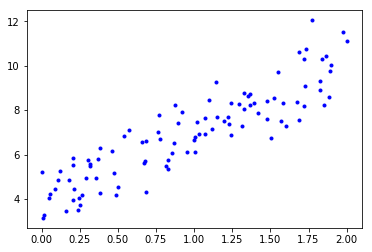

In [9]:
plt.plot(x,y,"b.")
plt.show()

In [14]:
x[:5,:]

array([[0.01670302],
       [1.47975877],
       [1.50440627],
       [1.71956538],
       [1.67541488]])

In [24]:
ones = np.ones((100,1))
x_b = np.hstack((ones,x))
x_b[:5,:]

array([[1.        , 0.01670302],
       [1.        , 1.47975877],
       [1.        , 1.50440627],
       [1.        , 1.71956538],
       [1.        , 1.67541488]])

In [22]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [23]:
theta_best

array([[4.00000171],
       [3.06475496]])

In [40]:
x_new =np.array([[0.5],[2]]) 

In [41]:
x_new_b = np.hstack((np.ones((2,1)),x_new))
x_new_b

array([[1. , 0.5],
       [1. , 2. ]])

In [42]:
y_new = x_new_b.dot(theta_best)
y_new

array([[ 5.53237919],
       [10.12951164]])

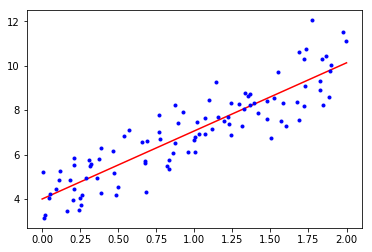

In [39]:
plt.plot(x_new,y_new,"r-")
plt.plot(x,y,"b.")
plt.show()

In [93]:
x2 = np.random.randint(20,80,(100,1))

In [101]:
y = 4+3 * x+np.random.randint(100,200,(100,1))

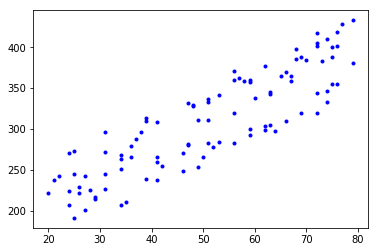

In [91]:
plt.plot(x,y,"b.")
plt.show()

In [95]:
x.shape

(100, 1)

In [96]:
x2.shape

(100, 1)

In [97]:
y.shape

(100, 1)

In [100]:
data = np.hstack((x,x2))
data = np.hstack((np.ones((100,1)),data))

In [104]:
theta_best = np.linalg.inv(data.T.dot(data)).dot(data.T).dot(y)

In [105]:
theta_best

array([[ 1.48836574e+02],
       [ 7.47953797e+00],
       [-3.03798786e-02]])

In [108]:
x_test = np.array([[1,1.5,25],[1,2.5,30]])
y_true = [[400],[500]]

y_pred = x_test.dot(theta_best)
y_pred

array([[159.29638431],
       [166.62402288]])

In [110]:
mse = sum((y_true-y_pred)**2)/len(y_true)
mse

array([84538.88636215])

In [111]:
import math
rmse = math.sqrt(sum((y_true-y_pred)**2)/len(y_true))
rmse

290.7557159578351

In [113]:
mae = sum(abs(y_true-y_pred))/len(y_pred)
mae

array([287.0397964])

In [114]:
import pandas as pd


In [115]:
df = pd.read_csv("data/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [117]:
x = df["YearsExperience"].values
y = df['Salary'].values


In [121]:
x = x.reshape(-1,1)

In [124]:
x_b = np.hstack((np.ones(x.shape),x))

In [125]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [126]:
theta_best

array([25792.20019867,  9449.96232146])

In [128]:
x_test = np.array([[1,15]])

In [129]:
x_test.dot(theta_best)

array([167541.63502049])

In [130]:
df = pd.read_csv("data/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


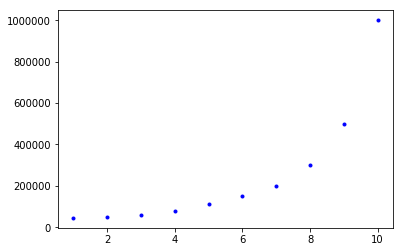

In [132]:
plt.plot(df['Level'].values,df['Salary'].values,"b.")
plt.show()

In [151]:
x = df.iloc[:,1].values.reshape(-1,1)
x_b = np.hstack((np.ones(x.shape),x))
y = df.iloc[:,2].values


In [139]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [141]:
x_new = np.array([[5],[12]])
x_test = np.array([[1,5],[1,12]])
y_pred  = x_test.dot(theta_best)

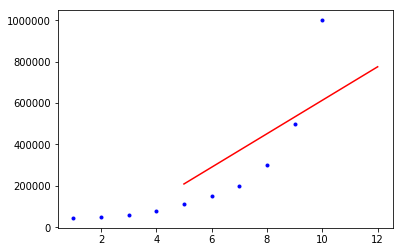

In [143]:
plt.plot(x_new,y_pred,"r-")
plt.plot(x,y,"b.")
plt.show()

In [144]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [145]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
lr.predict(x_new)

array([209060.60606061, 775212.12121212])

In [160]:
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(degree=2)
x_poly = pl.fit_transform(x)

x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [162]:
lr2 = LinearRegression()
lr2.fit(x_poly,y)

x_new_poly = pl.transform(x_new)

y_pred = lr2.predict(x_new_poly)

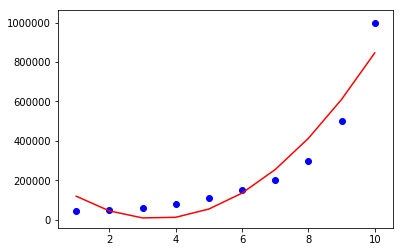

In [165]:
plt.plot(x,lr2.predict(pl.transform(x)),"r-")

plt.scatter(x,y,color="blue")
plt.show()

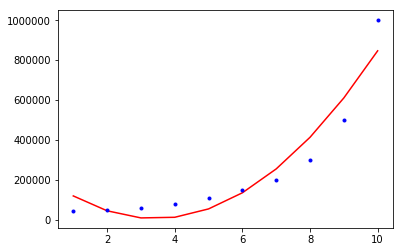

In [164]:
plt.plot(x,lr2.predict(pl.transform(x)),"r-")
plt.plot(x,y,"b.")
plt.show()